#ECSE 415 Assignment 1
Hanwen Wang 260778557

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# make path = './' connect to the path of the folder stroing images
path = '/content/drive/My Drive/ECSE_415_F_2020/Assignment_1/'

import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

Mounted at /content/drive


# 1. Thresholding

## 1.1

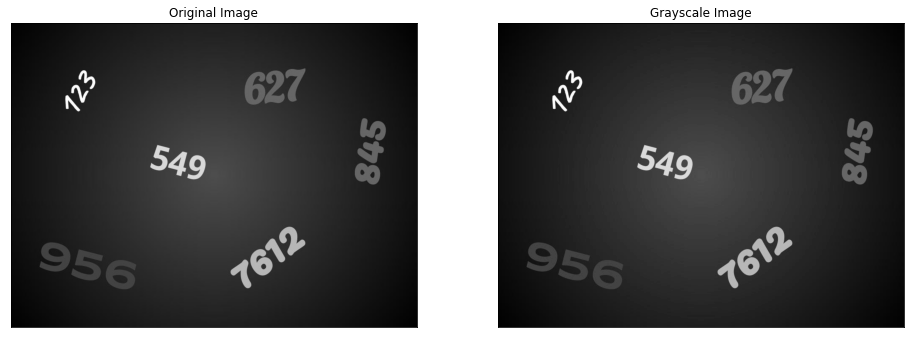

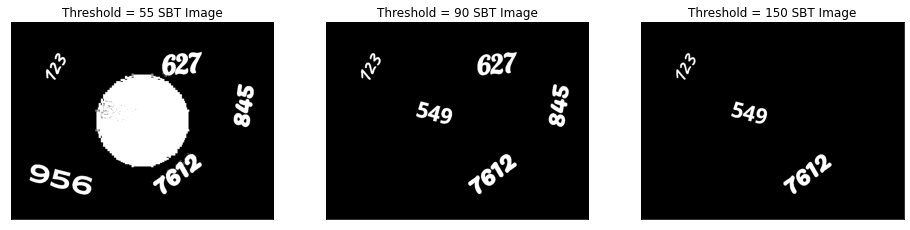

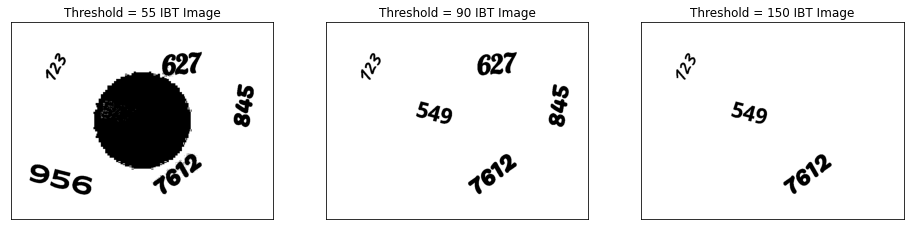

In [ ]:
# load image
image_path = path + "numbers.jpg"
img = cv2.imread(image_path)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

# set threshold
THRESH = np.array([55, 90, 150])

# create placeholders for the output
img_thresh_1 = np.zeros_like(img_gray)
img_thresh_2 = np.zeros_like(img_gray)
img_thresh_3 = np.zeros_like(img_gray)
img_thresh_4 = np.zeros_like(img_gray)
img_thresh_5 = np.zeros_like(img_gray)
img_thresh_6 = np.zeros_like(img_gray)

# simple binary thresholding
img_thresh_1[img_gray > THRESH[0]] = 255
img_thresh_2[img_gray > THRESH[1]] = 255
img_thresh_3[img_gray > THRESH[2]] = 255

# inverse binary thresholding
img_thresh_4[img_gray < THRESH[0]] = 255
img_thresh_5[img_gray < THRESH[1]] = 255
img_thresh_6[img_gray < THRESH[2]] = 255

# display images
plt.figure(figsize=(16,20))
plt.subplot(121), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image"), plt.xticks([]), plt.yticks([])

# three simple binary thresholding images
plt.figure(figsize=(16,20))
plt.subplot(131), plt.imshow(img_thresh_1, cmap="gray")
plt.title("Threshold = 55 SBT Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh_2, cmap="gray")
plt.title("Threshold = 90 SBT Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thresh_3, cmap="gray")
plt.title("Threshold = 150 SBT Image"), plt.xticks([]), plt.yticks([])

# three inverse binary thresholding images
plt.figure(figsize=(16,20))
plt.subplot(131), plt.imshow(img_thresh_4, cmap="gray")
plt.title("Threshold = 55 IBT Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh_5, cmap="gray")
plt.title("Threshold = 90 IBT Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thresh_6, cmap="gray")
plt.title("Threshold = 150 IBT Image"), plt.xticks([]), plt.yticks([])
plt.show()

## 1.2

For simple binary thresholding and inverse binary thresholding images, they are identical except that the color is opposite.\
For threshold equals to 55, 5 numbers are segmented, which are 123, 
627, 845, 956, 7612. The white glow in the middle of the image turns into a large hole which blocks number 549.\
For threshold equals to 90, 5 numbers are segmented, which are 123, 549, 627, 845, 7612.\
For threshold equals to 150, 3 numbers are segmented, which are 123, 549, 7612.\
Numbers 123 and 7612 are segmented at each threshold image, and they are a little bit thicker when threshold value is smaller. This is because the white glow around the number is considered as part of the number when threshold value is small.

## 1.3

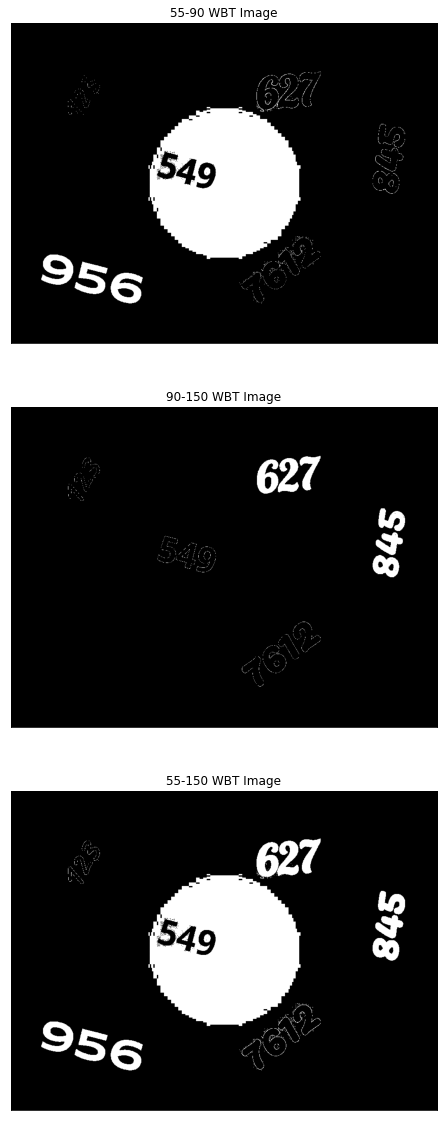

In [ ]:
# create placeholders for the output
img_thresh_1 = np.zeros_like(img_gray)
img_thresh_2 = np.zeros_like(img_gray)
img_thresh_3 = np.zeros_like(img_gray)

# window binary thresholding
#img_thresh_1[(img_gray < THRESH[0]) & (img_gray > THRESH[1])] = 0
img_thresh_1[(img_gray > THRESH[0]) & (img_gray < THRESH[1])] = 255
#img_thresh_2[(img_gray < THRESH[1]) & (img_gray > THRESH[2])] = 0
img_thresh_2[(img_gray > THRESH[1]) & (img_gray < THRESH[2])] = 255
#img_thresh_3[(img_gray < THRESH[0]) & (img_gray > THRESH[2])] = 0
img_thresh_3[(img_gray > THRESH[0]) & (img_gray < THRESH[2])] = 255

# three window binary thresholding images
plt.figure(figsize=(20,20))
plt.subplot(311), plt.imshow(img_thresh_1, cmap="gray")
plt.title("55-90 WBT Image"), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(img_thresh_2, cmap="gray")
plt.title("90-150 WBT Image"), plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(img_thresh_3, cmap="gray")
plt.title("55-150 WBT Image"), plt.xticks([]), plt.yticks([])

plt.show()

For range 55 to 90, two numbers are segmented, which are 549 and 956. 549 is black inside a white hole while 956 is white inside black background. There are three more numbers with clear white contour fullfilled with black color, which are 627, 845, 7612. Number 123 has unclear white contour.\
For range 90 to 150, two numbers are segmented, which are 627 and 845. They are both in white color. There are three more numbers with clear white contour fullfilled with black color, which are 123, 549, 7612.\
For range 55 to 150, four numbers are segmented, which are 549, 627, 845 and 956. 549 is a black number in a white hole while others are white numbers in black background. There are two more numbers with clear white contour fullfilled with black color, which are 123 and 7612.

## 1.4

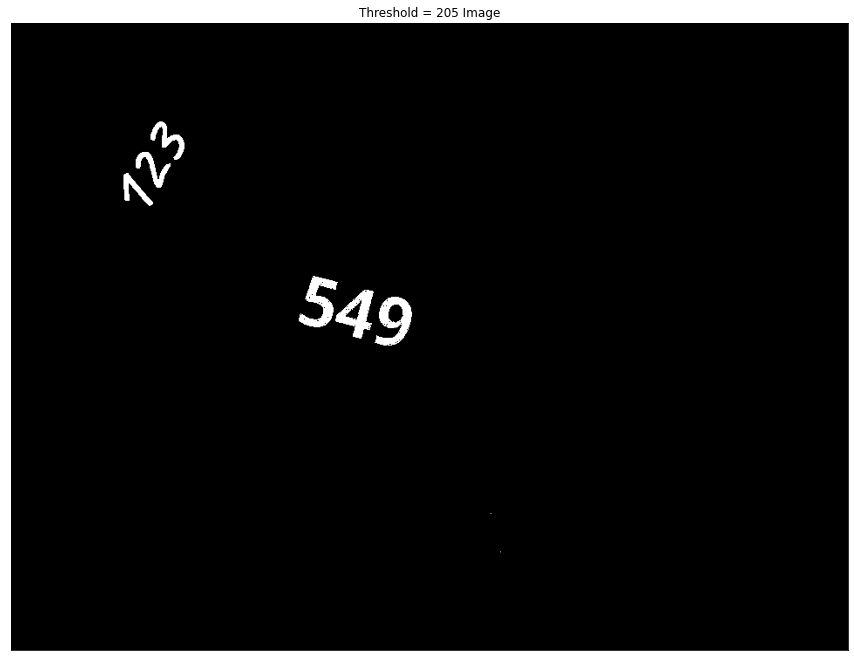

In [ ]:
# create placeholders for the output
img_thresh_1 = np.zeros_like(img_gray)

# window binary thresholding
#img_thresh_1[(img_gray < THRESH[0]) & (img_gray > THRESH[1])] = 0
img_thresh_1[img_gray > 205] = 255

# three window binary thresholding images
plt.figure(figsize=(15,15))
plt.subplot(111), plt.imshow(img_thresh_1, cmap="gray")
plt.title("Threshold = 205 Image"), plt.xticks([]), plt.yticks([])

plt.show()

The threshold value is 205. Firstly, since the number is in white color and whole background is black, I know I need to use simple binary thresholding method. Secondly, since when threshold is equal to 150, there are three segmented numbers which are 123, 549 and 7612, I need to delete value 7612. Then I look at the original image and see that 7612 is a little bit darker than 123 and 549, so I try threshold equals to 250 and see that only number 123 is remaining, which means threshold is too big. Thirdly, I try number 200, although both 123 and 549 are segmented, a little dotted noises appear on number 7612, which means I need to increase the threshold value a bit. Lastly, I choose 205 and the noise disappears and 123 and 549 are segmented.

# 2. Denoising

## 2.1

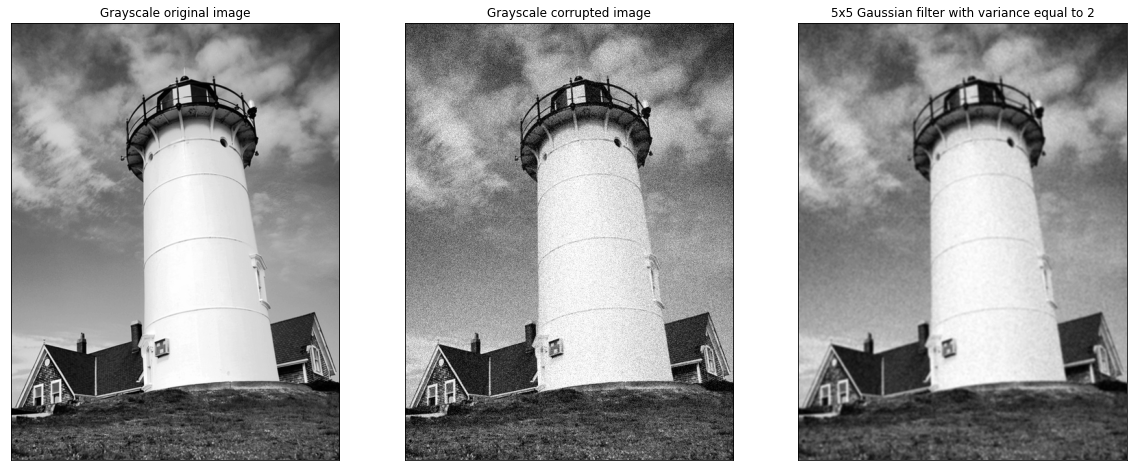

In [ ]:
# load image in grayscale
clean_image_path = path + "lighthouse.png"
img = cv2.imread(clean_image_path, 0)
corrupted_image_path = path + "gaussian_lighthouse.png"
corrupted_img = cv2.imread(corrupted_image_path, 0)

# filter image using 5x5 Gaussian
# since variance = sigma^2 = 2, standard deviation = square root of 2
res_gauss = cv2.GaussianBlur(corrupted_img, (5, 5), math.sqrt(2))

# plot
plt.figure(figsize = (20, 20))
plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title("Grayscale original image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(corrupted_img, cmap = 'gray')
plt.title("Grayscale corrupted image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(res_gauss, cmap = 'gray')
plt.title("5x5 Gaussian filter with variance equal to 2"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.2

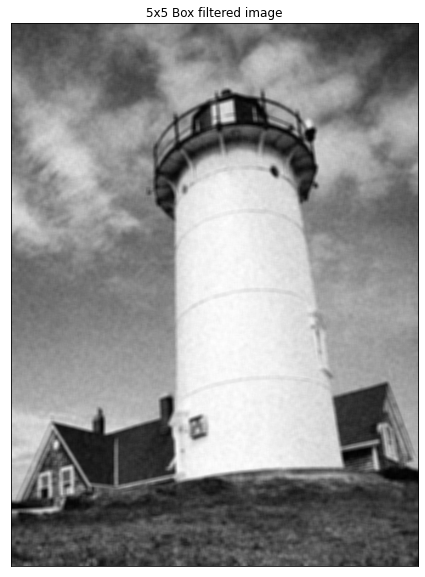

In [ ]:
# Create a custom kernel

# 5x5 array for box filtering
#kernel_box = np.array([[1, 1, 1, 1, 1],
#                       [1, 1, 1, 1, 1],
#                       [1, 1, 1, 1, 1],
#                       [1, 1, 1, 1, 1],
#                       [1, 1, 1, 1, 1]])/(25)
kernel_box = np.ones((5,5), dtype=np.int8)/(25)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_box = cv2.filter2D(corrupted_img, -1, kernel_box)

# plot
plt.figure(figsize = (10, 10))
plt.imshow(filtered_image_box, cmap = 'gray')
plt.title("5x5 Box filtered image"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.3

In [ ]:
# calculating PSNR value using cv2.PSNR
psnr1 = cv2.PSNR(img, res_gauss)
psnr2 = cv2.PSNR(img, filtered_image_box)
print("PSNR of gaussian filter to clean image is", psnr1)
print("PSNR of box filter to clean image is", psnr2)

PSNR of gaussian filter to clean image is 26.74217379291562
PSNR of box filter to clean image is 25.30151386920589


The PSNR value of gaussian filter is greater than that of box filter. As a result, gaussian filter gives superior result.

## 2.4

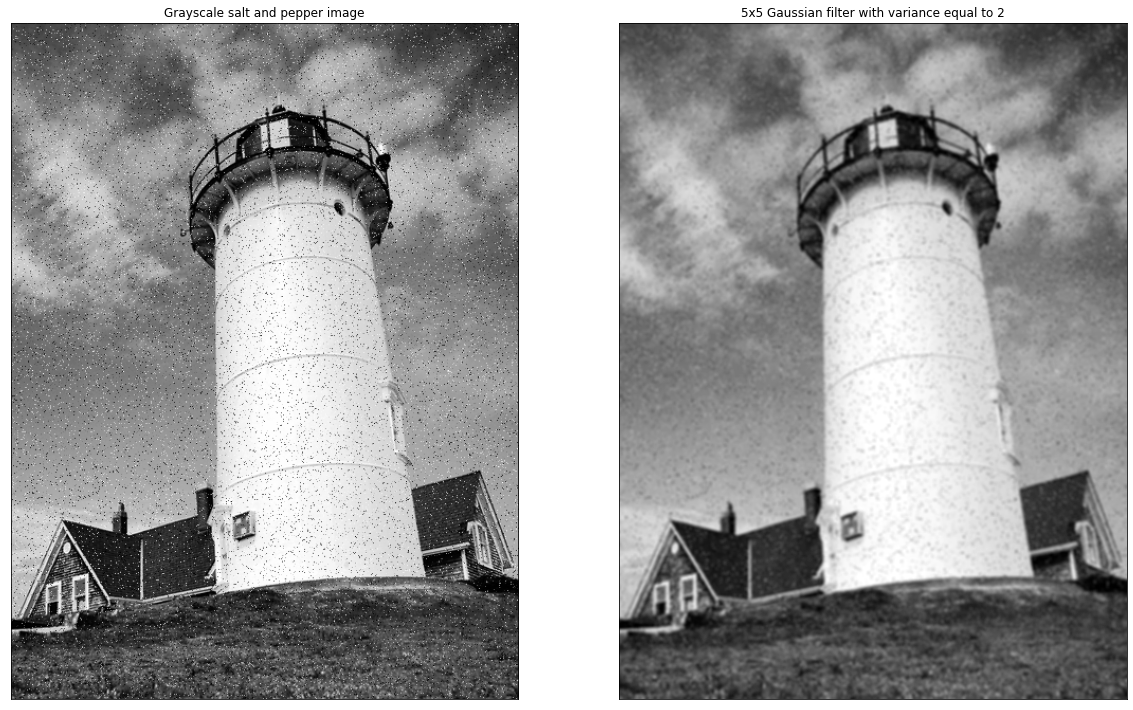

In [ ]:
# load image in grayscale
salted_image_path = path + "saltandpepper_lighthouse.png"
salted_img = cv2.imread(salted_image_path, 0)

# filter image using 5x5 Gaussian
# since variance = sigma square = 2, standard deviation = square root of 2
res_gaussian = cv2.GaussianBlur(salted_img, (5, 5), math.sqrt(2))

# plot
plt.figure(figsize = (20, 20))
plt.subplot(121), plt.imshow(salted_img, cmap = 'gray')
plt.title("Grayscale salt and pepper image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res_gaussian, cmap = 'gray')
plt.title("5x5 Gaussian filter with variance equal to 2"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.5

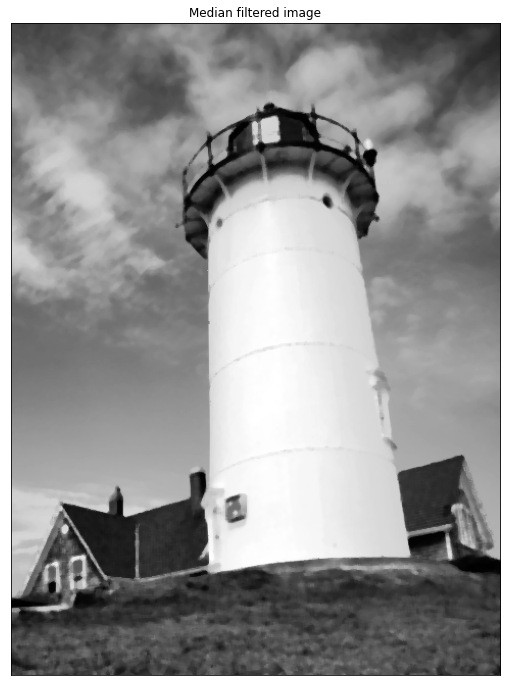

In [ ]:
res_median = cv2.medianBlur(salted_img, 5)

# plot
plt.figure(figsize=(12, 12))
plt.imshow(res_median, cmap='gray')
plt.title("Median filtered image"), plt.xticks([]), plt.yticks([])
plt.show()

## 2.6

In [ ]:
# calculating PSNR value using cv2.PSNR
psnr3 = cv2.PSNR(img, res_gaussian)
psnr4 = cv2.PSNR(img, res_median)
print("PSNR of gaussian filter to clean image is", psnr3)
print("PSNR of median filter to clean image is", psnr4)

PSNR of gaussian filter to clean image is 26.301445706937862
PSNR of median filter to clean image is 26.808546603069367


The PSNR value of gaussian filter is smaller than that of median filter. As a result, median filter gives superior result.

# 3. Sobel edge detector

## 3.1

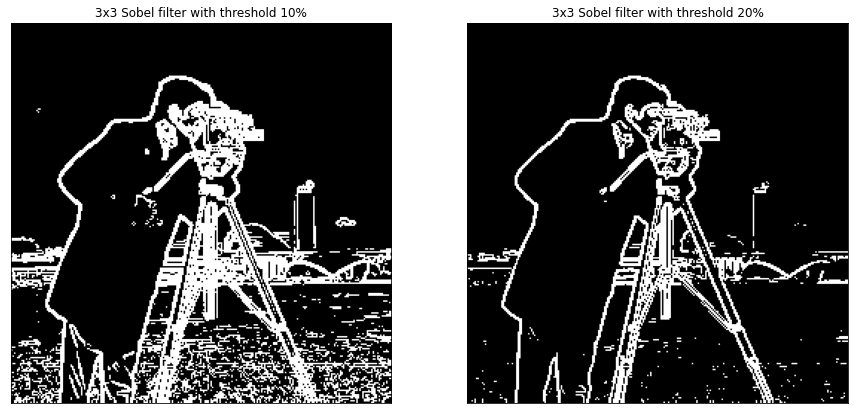

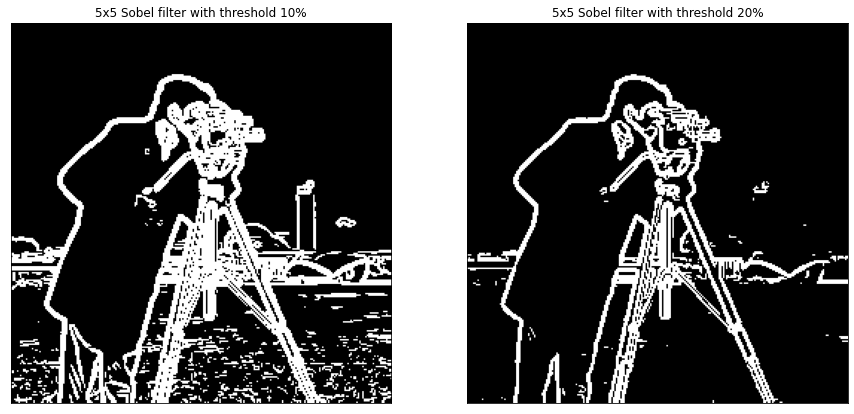

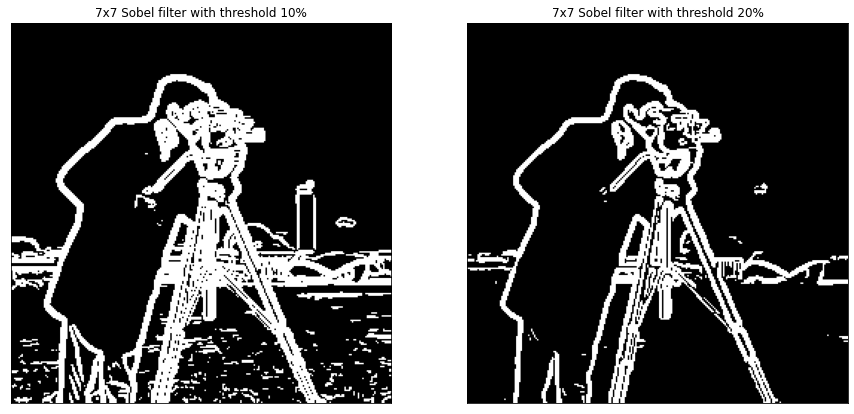

In [3]:
# load the image in grayscale
cameraman_img_path = path + "cameraman.png"
cameraman = cv2.imread(cameraman_img_path, 0);

# apply 3x3 Sobel filters to the intensity channel
l_x1 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=3)
l_y1 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=3)
# compute Sobel magnitude/phase
l_m1 = cv2.magnitude(l_x1, l_y1)
l_p1 = cv2.phase(l_x1, l_y1)
# set two thresholds: 10% and 20% of max pixel value in the filtered image
threshold1 = np.amax(l_m1) * 0.1
threshold2 = np.amax(l_m1) * 0.2
# create thresholded outputs
ret, img_thresh1 = cv2.threshold(l_m1, threshold1, 255, cv2.THRESH_BINARY)
ret, img_thresh2 = cv2.threshold(l_m1, threshold2, 255, cv2.THRESH_BINARY)

# apply 5x5 Sobel filters to the intensity channel
l_x2 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=5)
l_y2 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=5)
# compute Sobel magnitude/phase
l_m2 = cv2.magnitude(l_x2, l_y2)
l_p2 = cv2.phase(l_x2, l_y2)
# set two thresholds: 10% and 20% of max pixel value in the filtered image
threshold3 = np.amax(l_m2) * 0.1
threshold4 = np.amax(l_m2) * 0.2
# create thresholded outputs
ret, img_thresh3 = cv2.threshold(l_m2, threshold3, 255, cv2.THRESH_BINARY)
ret, img_thresh4 = cv2.threshold(l_m2, threshold4, 255, cv2.THRESH_BINARY)

# apply 7x7 Sobel filters to the intensity channel
l_x3 = cv2.Sobel(cameraman, cv2.CV_64F, 1, 0, ksize=7)
l_y3 = cv2.Sobel(cameraman, cv2.CV_64F, 0, 1, ksize=7)
# compute Sobel magnitude/phase
l_m3 = cv2.magnitude(l_x3, l_y3)
l_p3 = cv2.phase(l_x3, l_y3)
# set two thresholds: 10% and 20% of max pixel value in the filtered image
threshold5 = np.amax(l_m3) * 0.1
threshold6 = np.amax(l_m3) * 0.2
# create thresholded outputs
ret, img_thresh5 = cv2.threshold(l_m3, threshold5, 255, cv2.THRESH_BINARY)
ret, img_thresh6 = cv2.threshold(l_m3, threshold6, 255, cv2.THRESH_BINARY)

# display images in 3 rows and 2 columns
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_thresh1, cmap="gray")
plt.title("3x3 Sobel filter with threshold 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh2, cmap="gray")
plt.title("3x3 Sobel filter with threshold 20%"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_thresh3, cmap="gray")
plt.title("5x5 Sobel filter with threshold 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh4, cmap="gray")
plt.title("5x5 Sobel filter with threshold 20%"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_thresh5, cmap="gray")
plt.title("7x7 Sobel filter with threshold 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh6, cmap="gray")
plt.title("7x7 Sobel filter with threshold 20%"), plt.xticks([]), plt.yticks([])
plt.show()

When the filter size gets smaller, more details and noises are shown, edges are sharper. For example, when the threshold is 10%, more messy white grass is visable and the camera has a sharp contour in 3x3 Sobel filterd image, while in the other two images, grass is less and contour is smooth. When the threshold is 20%, we can see clearly the contour of face and camera and little dots of grass in 3x3 Sobel filtered image, while in the other two images, the face is connected to the camera and nearly no grass dots.

## 3.2

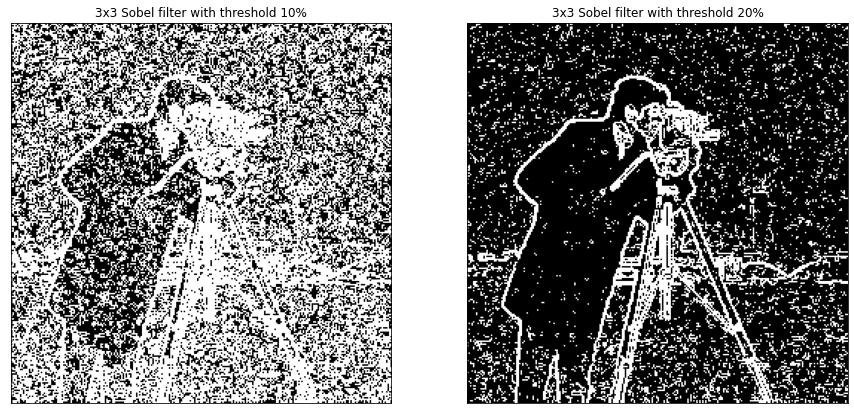

In [ ]:
# load the image in grayscale
gauss_cameraman_img_path = path + "gaussian_cameraman.png"
gauss_cameraman = cv2.imread(gauss_cameraman_img_path, 0);

# apply 3x3 Sobel filters to the intensity channel
l_x = cv2.Sobel(gauss_cameraman, cv2.CV_64F, 1, 0, ksize=3)
l_y = cv2.Sobel(gauss_cameraman, cv2.CV_64F, 0, 1, ksize=3)
# compute Sobel magnitude/phase
l_m = cv2.magnitude(l_x, l_y)
l_p = cv2.phase(l_x, l_y)
# set two thresholds: 10% and 20% of max pixel value in the filtered image
threshold_1 = np.amax(l_m) * 0.1
threshold_2 = np.amax(l_m) * 0.2
# create thresholded outputs
ret, img_threshs1 = cv2.threshold(l_m, threshold_1, 255, cv2.THRESH_BINARY)
ret, img_threshs2 = cv2.threshold(l_m, threshold_2, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_threshs1, cmap="gray")
plt.title("3x3 Sobel filter with threshold 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_threshs2, cmap="gray")
plt.title("3x3 Sobel filter with threshold 20%"), plt.xticks([]), plt.yticks([])
plt.show()

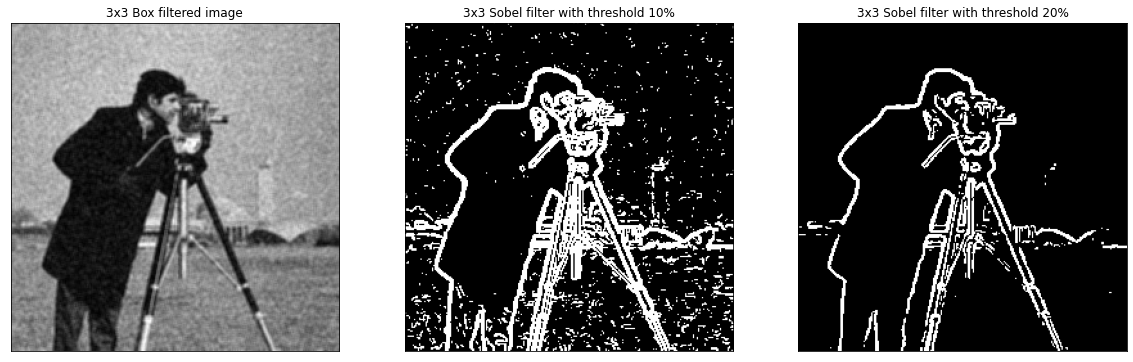

In [ ]:
# Create a custom kernel

# 3x3 array for box filtering
kernel_box = np.ones((3,3), dtype=np.int8)/(9)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
box_filtered_image = cv2.filter2D(gauss_cameraman, -1, kernel_box)

# apply 3x3 Sobel filters to the intensity channel
l_xd = cv2.Sobel(box_filtered_image, cv2.CV_64F, 1, 0, ksize=3)
l_yd = cv2.Sobel(box_filtered_image, cv2.CV_64F, 0, 1, ksize=3)
# compute Sobel magnitude/phase
l_md = cv2.magnitude(l_xd, l_yd)
l_pd = cv2.phase(l_xd, l_yd)
# create thresholded outputs
ret, img_threshd1 = cv2.threshold(l_md, threshold_1, 255, cv2.THRESH_BINARY)
ret, img_threshd2 = cv2.threshold(l_md, threshold_2, 255, cv2.THRESH_BINARY)

# plot
plt.figure(figsize = (20, 20))
plt.subplot(131), plt.imshow(box_filtered_image, cmap = 'gray')
plt.title("3x3 Box filtered image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_threshd1, cmap = 'gray')
plt.title("3x3 Sobel filter with threshold 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_threshd2, cmap = 'gray')
plt.title("3x3 Sobel filter with threshold 20%"), plt.xticks([]), plt.yticks([])
plt.show()

Using denoising prior to edge detection greatly reduces noises that appear on the output image, which makes the image clearer and make edges easier to be distinguished. After 3x3 Sobel filter with threshold 10%, the former output image is full of noises and hard to distinguish, while in contrast, we can clearly see the edges in the later one with just only a few noises. What's more, when threshold is 20%, the later one almost has no noises while the former one still has noises over the whole image.

# 4. Canny edge detection

## 4.1

1. Filter image with x, y derivatives of Gaussian.
2. Find magnitude and orientation of gradient.
3. Non-maximum suppression: Thin multi-pixel wide "ridges" down to single pixel width.
4. Thresholding and linking: Define two thresholds: low and high. Use the high threshold to start edge curves and the low threshold to continue them.

## 4.2

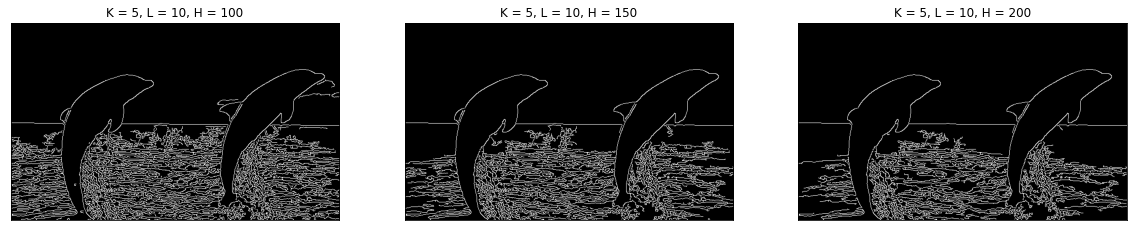

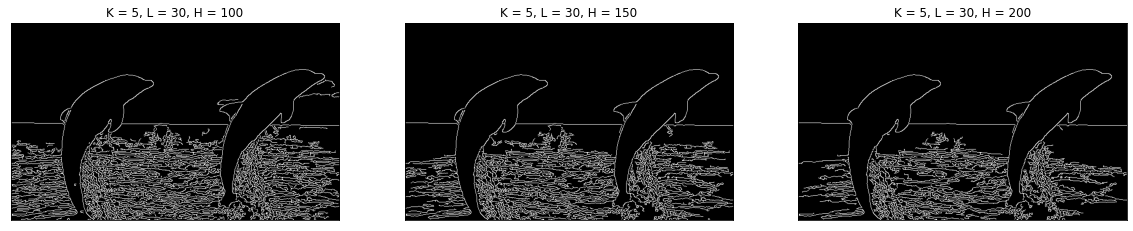

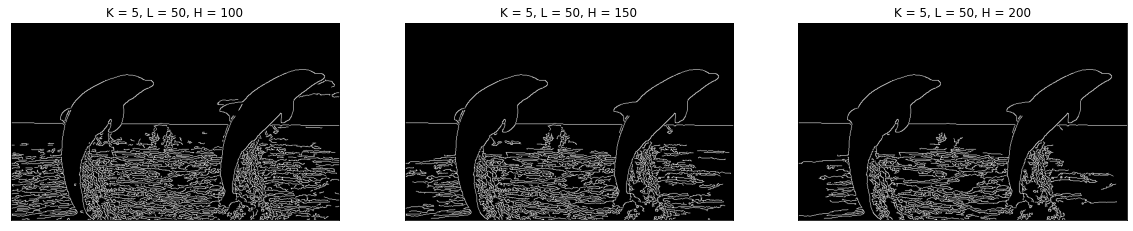

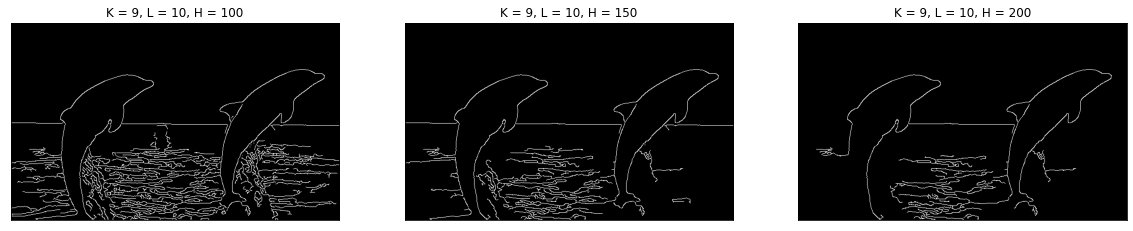

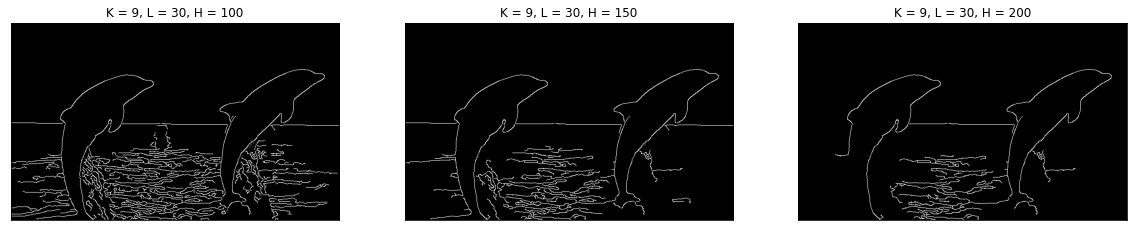

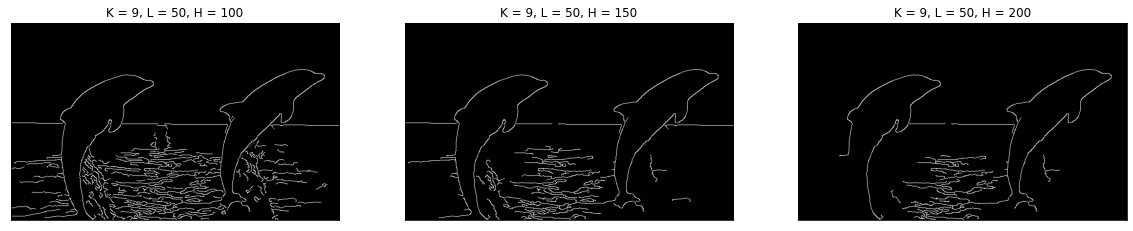

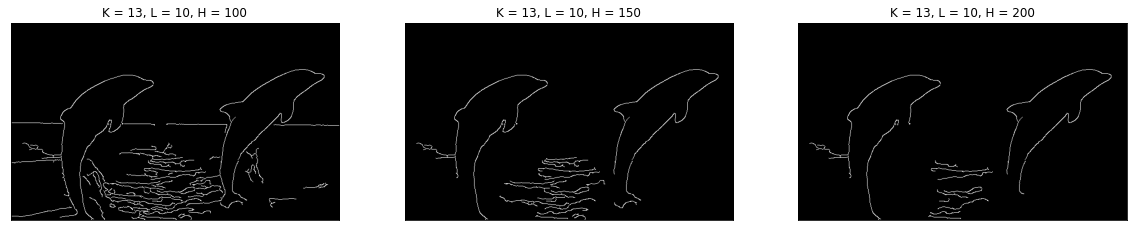

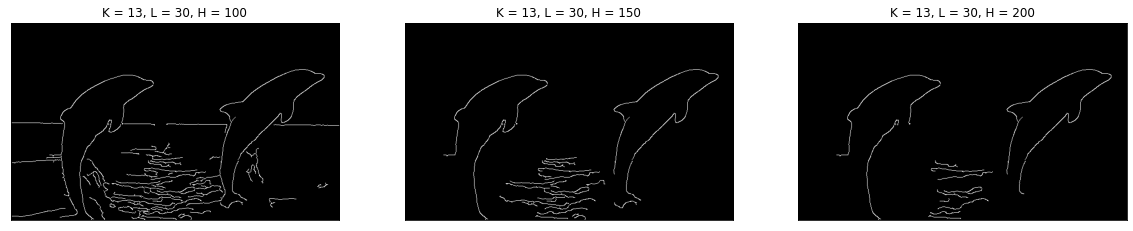

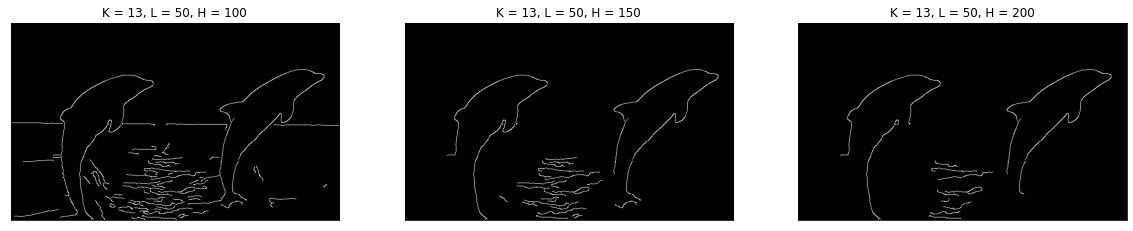

In [ ]:
# load image in grayscale
dolphin_image_path = path + "dolphin.jpg"
dolphin_img = cv2.imread(dolphin_image_path, 0)

# list three arrays of hyperparameters
K = np.array([5, 9, 13])
L = np.array([10, 30, 50])
H = np.array([100, 150, 200])

# three kernel sizes of gaussian smoothing
img_gauss_0 = cv2.GaussianBlur(dolphin_img, (K[0], K[0]), 0)
img_gauss_1 = cv2.GaussianBlur(dolphin_img, (K[1], K[1]), 0)
img_gauss_2 = cv2.GaussianBlur(dolphin_img, (K[2], K[2]), 0)

# Canny edge detection when kernel size = 5
img_edge0_0 = cv2.Canny(img_gauss_0, L[0], H[0])
img_edge0_1 = cv2.Canny(img_gauss_0, L[0], H[1])
img_edge0_2 = cv2.Canny(img_gauss_0, L[0], H[2])
img_edge0_3 = cv2.Canny(img_gauss_0, L[1], H[0])
img_edge0_4 = cv2.Canny(img_gauss_0, L[1], H[1])
img_edge0_5 = cv2.Canny(img_gauss_0, L[1], H[2])
img_edge0_6 = cv2.Canny(img_gauss_0, L[2], H[0])
img_edge0_7 = cv2.Canny(img_gauss_0, L[2], H[1])
img_edge0_8 = cv2.Canny(img_gauss_0, L[2], H[2])
# Canny edge detection when kernel size = 9
img_edge1_0 = cv2.Canny(img_gauss_1, L[0], H[0])
img_edge1_1 = cv2.Canny(img_gauss_1, L[0], H[1])
img_edge1_2 = cv2.Canny(img_gauss_1, L[0], H[2])
img_edge1_3 = cv2.Canny(img_gauss_1, L[1], H[0])
img_edge1_4 = cv2.Canny(img_gauss_1, L[1], H[1])
img_edge1_5 = cv2.Canny(img_gauss_1, L[1], H[2])
img_edge1_6 = cv2.Canny(img_gauss_1, L[2], H[0])
img_edge1_7 = cv2.Canny(img_gauss_1, L[2], H[1])
img_edge1_8 = cv2.Canny(img_gauss_1, L[2], H[2])
# Canny edge detection when kernel size = 13
img_edge2_0 = cv2.Canny(img_gauss_2, L[0], H[0])
img_edge2_1 = cv2.Canny(img_gauss_2, L[0], H[1])
img_edge2_2 = cv2.Canny(img_gauss_2, L[0], H[2])
img_edge2_3 = cv2.Canny(img_gauss_2, L[1], H[0])
img_edge2_4 = cv2.Canny(img_gauss_2, L[1], H[1])
img_edge2_5 = cv2.Canny(img_gauss_2, L[1], H[2])
img_edge2_6 = cv2.Canny(img_gauss_2, L[2], H[0])
img_edge2_7 = cv2.Canny(img_gauss_2, L[2], H[1])
img_edge2_8 = cv2.Canny(img_gauss_2, L[2], H[2])

# display images
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge0_0, cmap="gray")
plt.title("K = 5, L = 10, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge0_1, cmap="gray")
plt.title("K = 5, L = 10, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge0_2, cmap="gray")
plt.title("K = 5, L = 10, H = 200"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge0_3, cmap="gray")
plt.title("K = 5, L = 30, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge0_4, cmap="gray")
plt.title("K = 5, L = 30, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge0_5, cmap="gray")
plt.title("K = 5, L = 30, H = 200"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge0_6, cmap="gray")
plt.title("K = 5, L = 50, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge0_7, cmap="gray")
plt.title("K = 5, L = 50, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge0_8, cmap="gray")
plt.title("K = 5, L = 50, H = 200"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge1_0, cmap="gray")
plt.title("K = 9, L = 10, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge1_1, cmap="gray")
plt.title("K = 9, L = 10, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge1_2, cmap="gray")
plt.title("K = 9, L = 10, H = 200"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge1_3, cmap="gray")
plt.title("K = 9, L = 30, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge1_4, cmap="gray")
plt.title("K = 9, L = 30, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge1_5, cmap="gray")
plt.title("K = 9, L = 30, H = 200"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge1_6, cmap="gray")
plt.title("K = 9, L = 50, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge1_7, cmap="gray")
plt.title("K = 9, L = 50, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge1_8, cmap="gray")
plt.title("K = 9, L = 50, H = 200"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge2_0, cmap="gray")
plt.title("K = 13, L = 10, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge2_1, cmap="gray")
plt.title("K = 13, L = 10, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge2_2, cmap="gray")
plt.title("K = 13, L = 10, H = 200"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge2_3, cmap="gray")
plt.title("K = 13, L = 30, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge2_4, cmap="gray")
plt.title("K = 13, L = 30, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge2_5, cmap="gray")
plt.title("K = 13, L = 30, H = 200"), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img_edge2_6, cmap="gray")
plt.title("K = 13, L = 50, H = 100"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_edge2_7, cmap="gray")
plt.title("K = 13, L = 50, H = 150"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_edge2_8, cmap="gray")
plt.title("K = 13, L = 50, H = 200"), plt.xticks([]), plt.yticks([])
plt.show()

## 4.3

When either value of K, L, H increases, the number of edge of water in the output image will decrease, which will reduce noises. When value increases, both K and H can greatly reduce noises, the effect of H is a bit stronger than that of K, but H has a problem that it will lead to discontinuity of edges of dolphin while changing K does not affect that. In contrast, the effect of L is not that obvious compared to that of the other two. It only eliminates a small part of water edges and almost keep the dolphin edges unchanged.\
When K is small, even though H is large, not many noises can be reduced. However, if K is large as well, a lot of noises can be reduced. So in order to achieve a good performance, both K and H should have a high value.

## 4.4

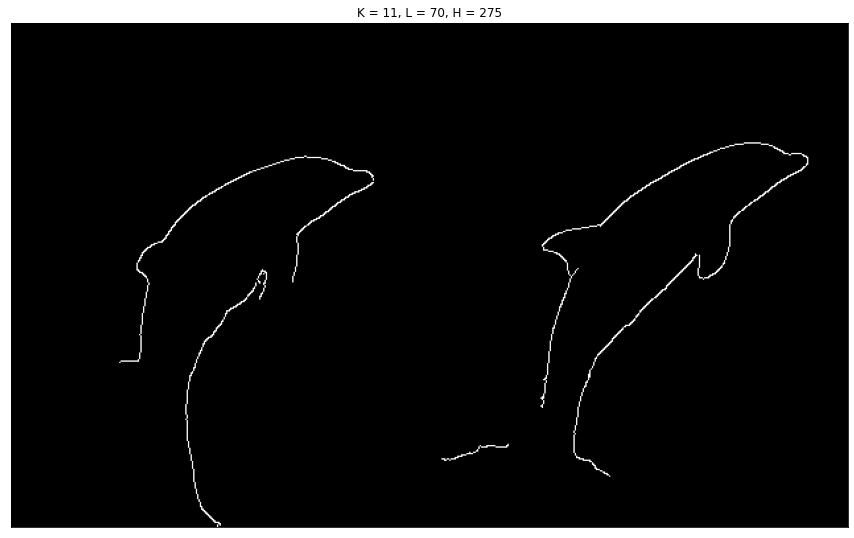

In [ ]:
img_gauss_dol = cv2.GaussianBlur(dolphin_img, (11, 11), 0)
img_edge_d = cv2.Canny(img_gauss_dol, 70, 275)

# display image
plt.figure(figsize=(15,15))
plt.imshow(img_edge_d, cmap="gray")
plt.title("K = 11, L = 70, H = 275"), plt.xticks([]), plt.yticks([])
plt.show()

# 5. Harris corner detection

## Implementation

In [ ]:
# define harris corner detection
def harris_corner_detection(input_img, threshold):
  # boolean non-maximum supression
  NMS = False
  # default k value
  k = 0.05
  # get the height and width of the input image
  h, w = input_img.shape[:2]
  # create a 3-D matrix to store values of gradients calculated
  gradient = np.zeros((h,w,2),dtype=np.float32)
  # compute image derivatives
  gradient[:,:,0] = cv2.Sobel(input_img, cv2.CV_16S, 1, 0, ksize=3)
  gradient[:,:,1] = cv2.Sobel(input_img, cv2.CV_16S, 0, 1, ksize=3)

  # create a 3-D matrix to store values of multiplication of gradients
  S = np.zeros((h,w,3),dtype=np.float32)
  # compute product of derivatives
  S[:,:,0] = gradient[:,:,0] * gradient[:,:,0]
  S[:,:,1] = gradient[:,:,1] * gradient[:,:,1]
  S[:,:,2] = gradient[:,:,0] * gradient[:,:,1]

  # apply a 3x3 gaussian filter
  S[:,:,0] = cv2.GaussianBlur(S[:,:,0], (3,3), 0)
  S[:,:,1] = cv2.GaussianBlur(S[:,:,1], (3,3), 0)
  S[:,:,2] = cv2.GaussianBlur(S[:,:,2], (3,3), 0)
  # reshape it into a 2x2 matrix
  S = [np.array([[S[i,j,0],S[i,j,2]],[S[i,j,2],S[i,j,1]]]) for i in range(h) for j in range(w)]

  # calculate the determinant and trace of the 2x2 matrix
  det, trace = list(map(np.linalg.det, S)), list(map(np.trace, S))
  # calculate the cornerness function
  har = np.array([d-k*t**2 for d,t in zip(det,trace)])
  har_max = np.max(har)
  # print(har_max)
  har = har.reshape(h, w)
  # print(har)
  corner = np.zeros_like(har,dtype=np.uint8)
  for i in range(h):
    for j in range(w):
      if NMS == False:
        # threshold on har and then apply non-maxima supression in 3x3 neighbour
        if har[i,j] > har_max*threshold and har[i,j] == np.max(har[max(0,i-1):min(i+2,h-1),max(0,j-1):min(j+2,w-1)]):
          corner[i,j] = 255
      else:
        # only apply threshold detection
        if har[i,j] > har_max*threshold:
          corner[i,j] = 255
  return corner

## 5.1

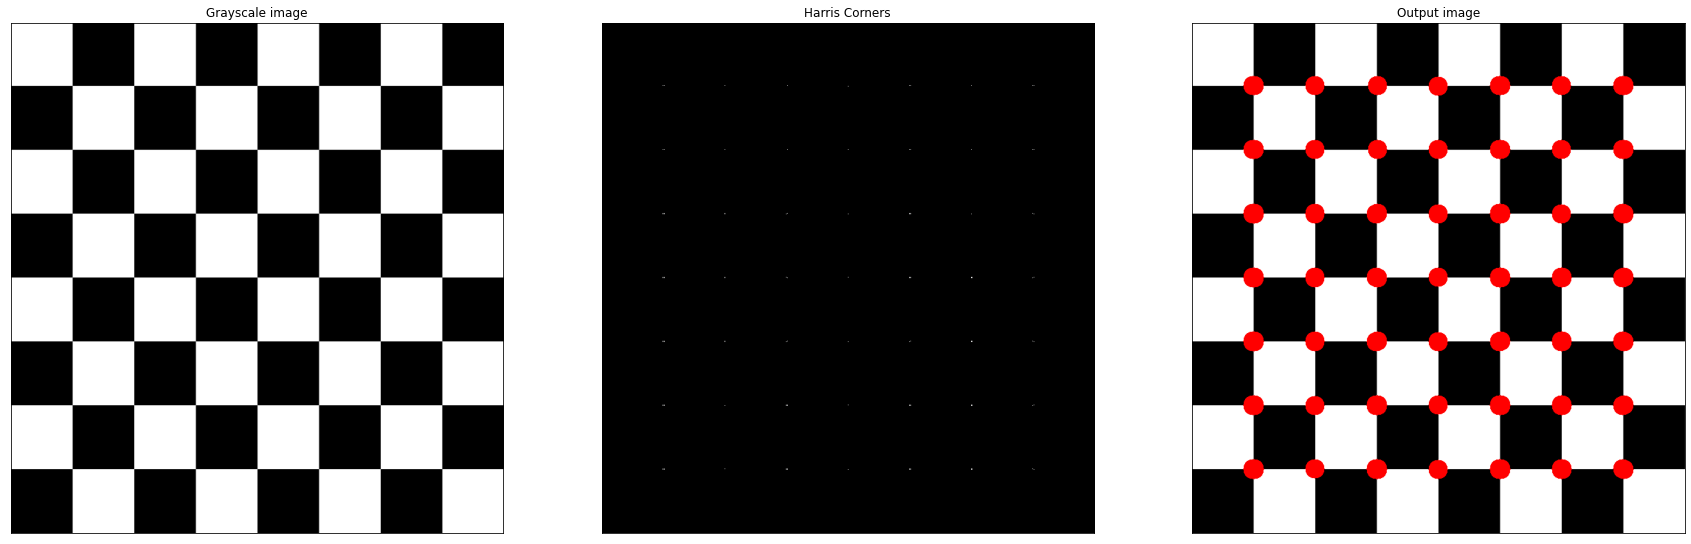

In [ ]:
# load image
checker_image_path = path + "checkerboard.png"
checker_img = cv2.imread(checker_image_path)

# convert to grayscale
checker_img_gray = cv2.cvtColor(checker_img, cv2.COLOR_RGB2GRAY)
# set threshold
threshold = 0.01
# copy image
img_disp = checker_img.copy()
# apply harris corner detection
HCD_checker = harris_corner_detection(checker_img_gray, threshold)

# normalize corner map [0,1]
# cv2.normalize(src, dst, alpha, beta, norm_type)
# min_I(dst(I)) = alpha, max_I(dst(I)) = beta
cv2.normalize(HCD_checker, HCD_checker, 0, 2, cv2.NORM_MINMAX)

# list all points higher than threshold
loc = np.where(HCD_checker >= threshold)

# loop though points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 15, (255,0,0), -1)

# plot images
plt.figure(figsize = (30, 30))
plt.subplot(131), plt.imshow(checker_img_gray, cmap = 'gray')
plt.title("Grayscale image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(HCD_checker, cmap = 'gray')
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_disp, cmap = 'gray')
plt.title("Output image"), plt.xticks([]), plt.yticks([])
plt.show()

The original threshold value is 0.01. I change the value by 0.1 each time.<br> When the value is smaller or equal to 0, the output image is completely filled with red color.<br> When the value is from 0.01 to 0.5, all corners are shown on the borad and the image is very similar to the required output image.<br> When the value is greater or equal to 0.6 but less than 1, corners are missing and the number of missing corners increases with the threshold value.<br> When the value is greater or equal to 1, no points show on the checkerboard.

## 5.2

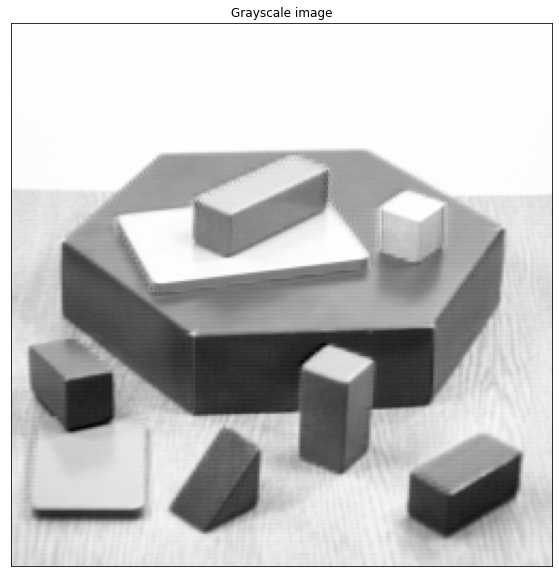

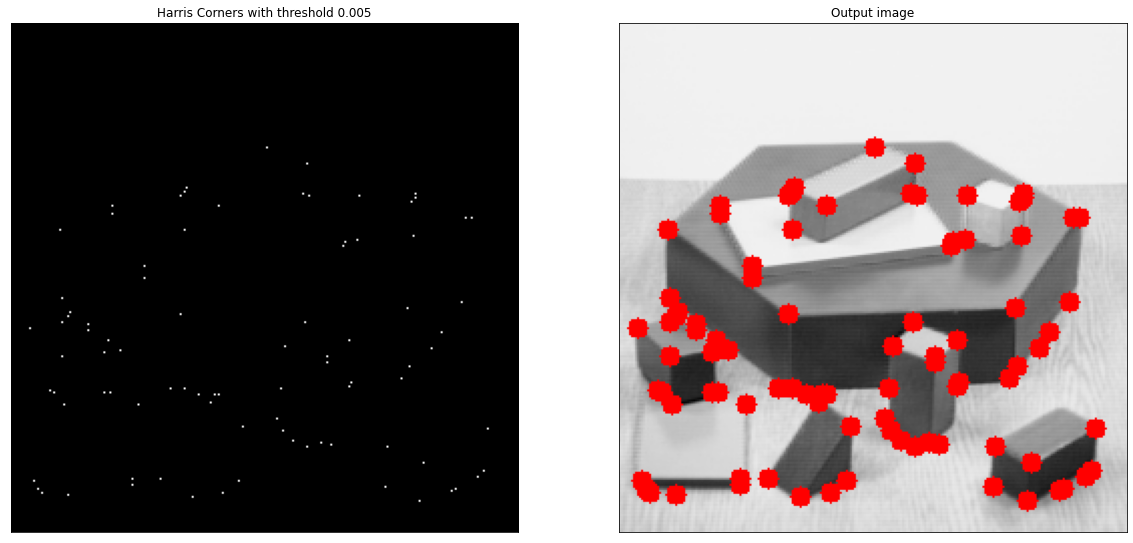

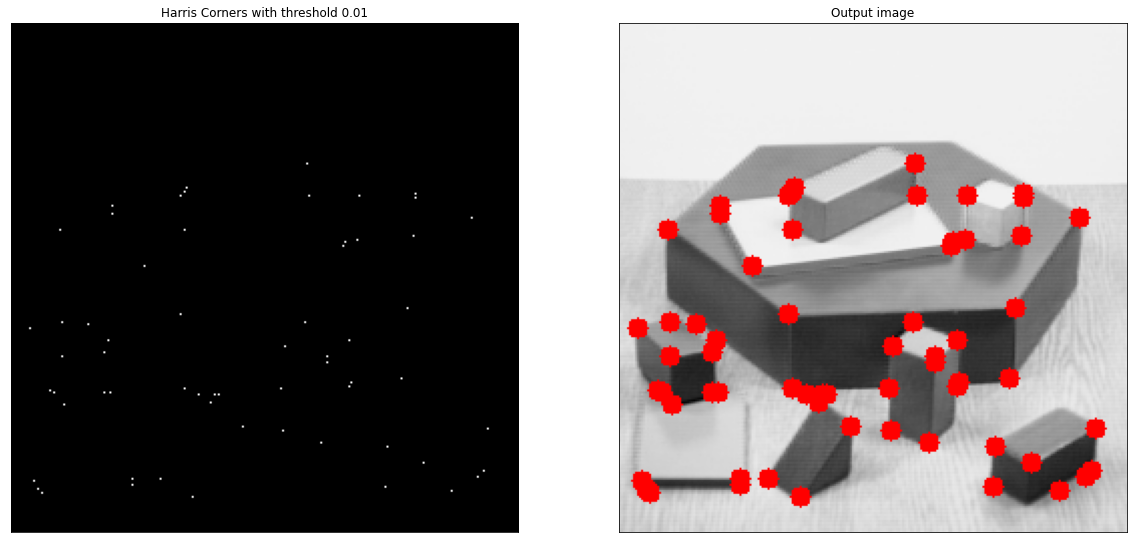

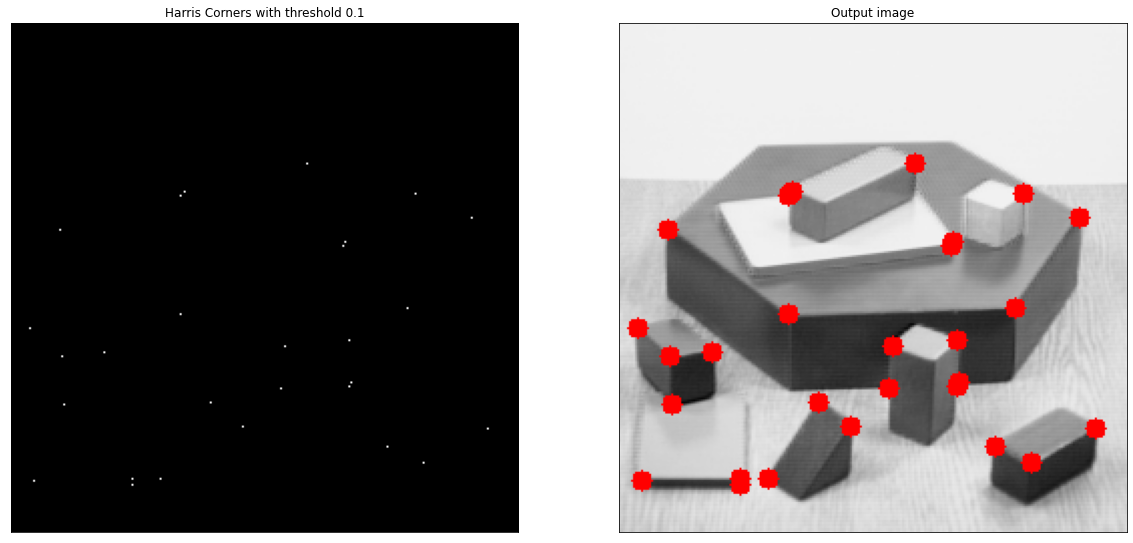

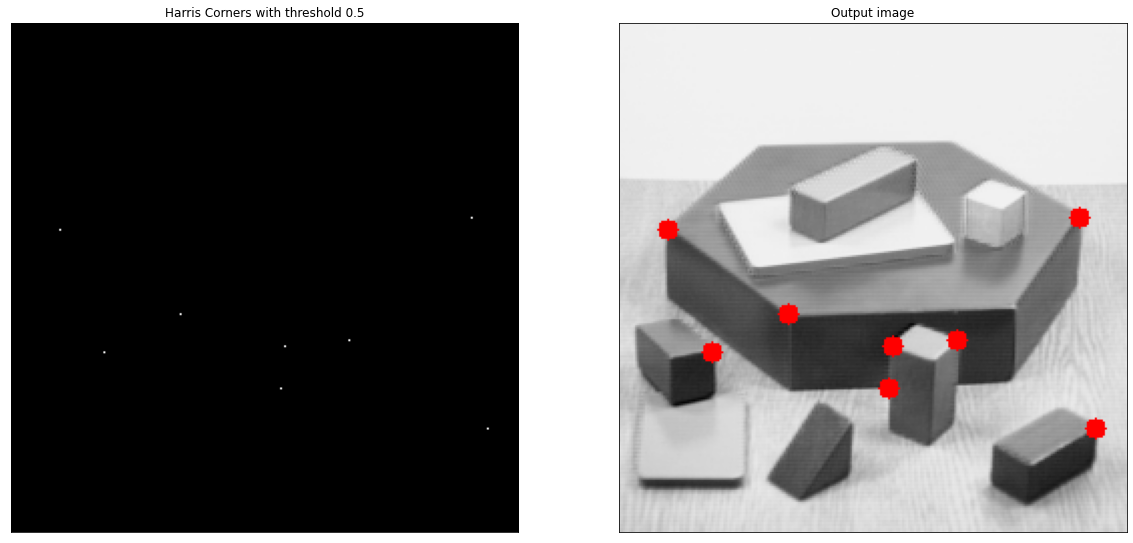

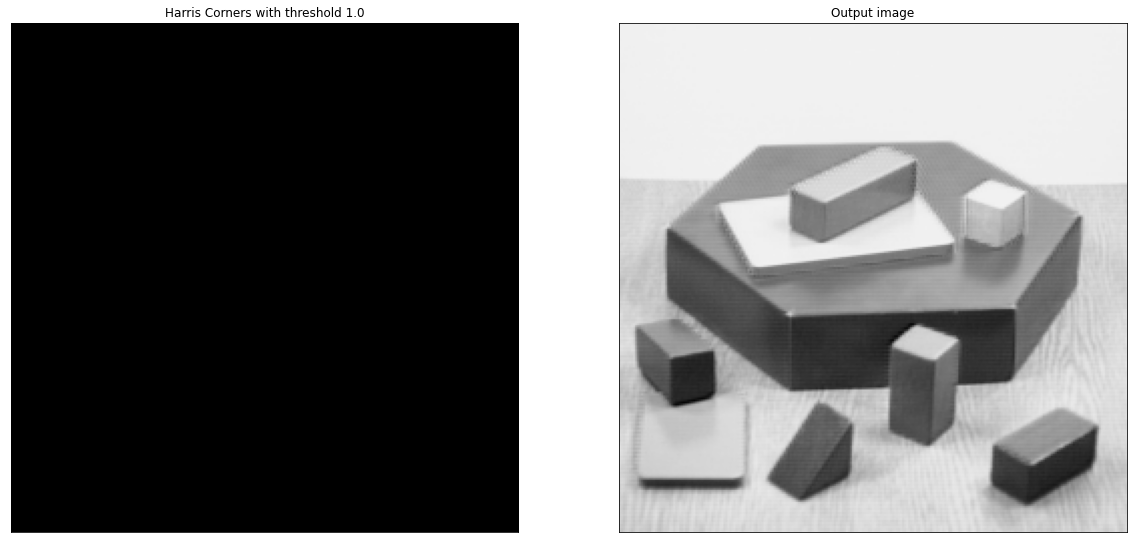

In [ ]:
# load image
shapes_image_path = path + "shapes.png"
shapes_img = cv2.imread(shapes_image_path)

# convert to grayscale
shapes_img_gray = cv2.cvtColor(shapes_img, cv2.COLOR_RGB2GRAY)

# set threshold
threshold = np.array([0.005, 0.01, 0.1, 0.5, 1])
# plot grayscale image
plt.figure(figsize = (10, 10))
plt.imshow(shapes_img_gray, cmap = 'gray')
plt.title("Grayscale image"), plt.xticks([]), plt.yticks([])
for i in threshold:
  # copy image
  img_dis = shapes_img.copy()
  # apply harris corner detection
  HCD_shapes = harris_corner_detection(shapes_img_gray, i)

  # normalize corner map [0,1]
  # cv2.normalize(src, dst, alpha, beta, norm_type)
  # min_I(dst(I)) = alpha, max_I(dst(I)) = beta
  cv2.normalize(HCD_shapes, HCD_shapes, 0, 2, cv2.NORM_MINMAX)

  # list all points higher than threshold
  loc = np.where(HCD_shapes >= i)

  # loop though points
  for pt in zip(*loc[::-1]):
      # draw filled circle on each point
      # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
      cv2.circle(img_dis, pt, 5, (255,0,0), -1)

  # plot
  plt.figure(figsize = (20, 20))
  plt.subplot(121), plt.imshow(HCD_shapes, cmap = 'gray')
  plt.title("Harris Corners with threshold %s" %i), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(img_dis, cmap = 'gray')
  plt.title("Output image"), plt.xticks([]), plt.yticks([])
plt.show()

When the threshold value increases, less corners are shown in the output image. But if the threshold value is too small, some noises occur. And also some corners are not detected even if the threshold value is very small.

## 5.3

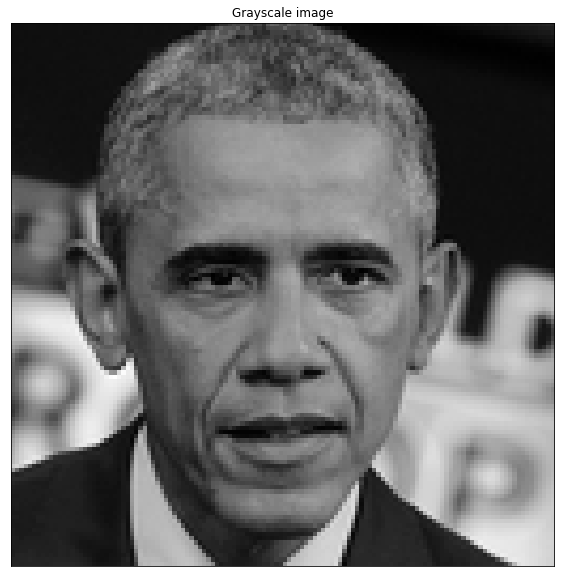

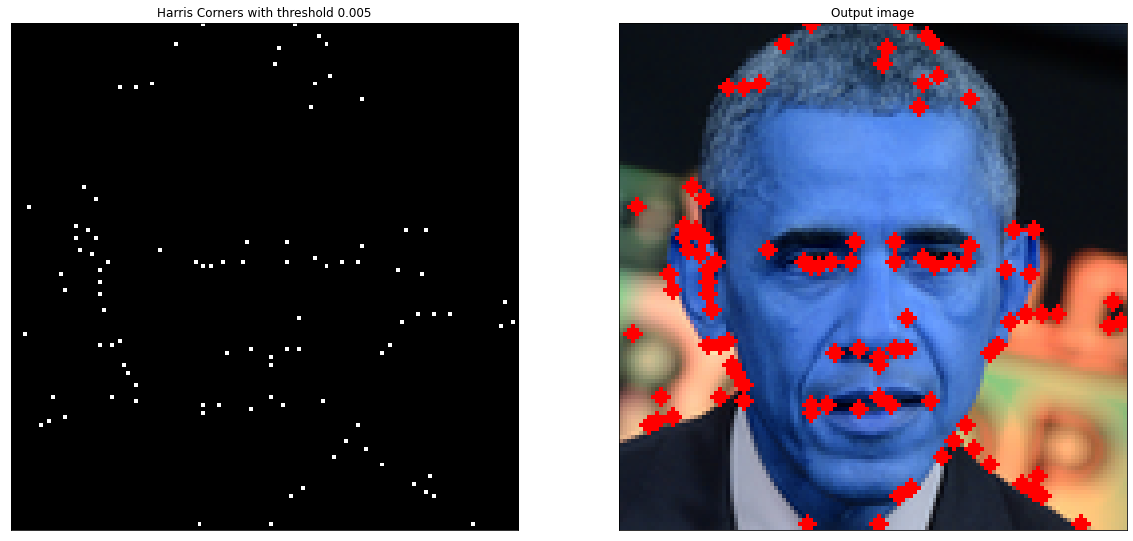

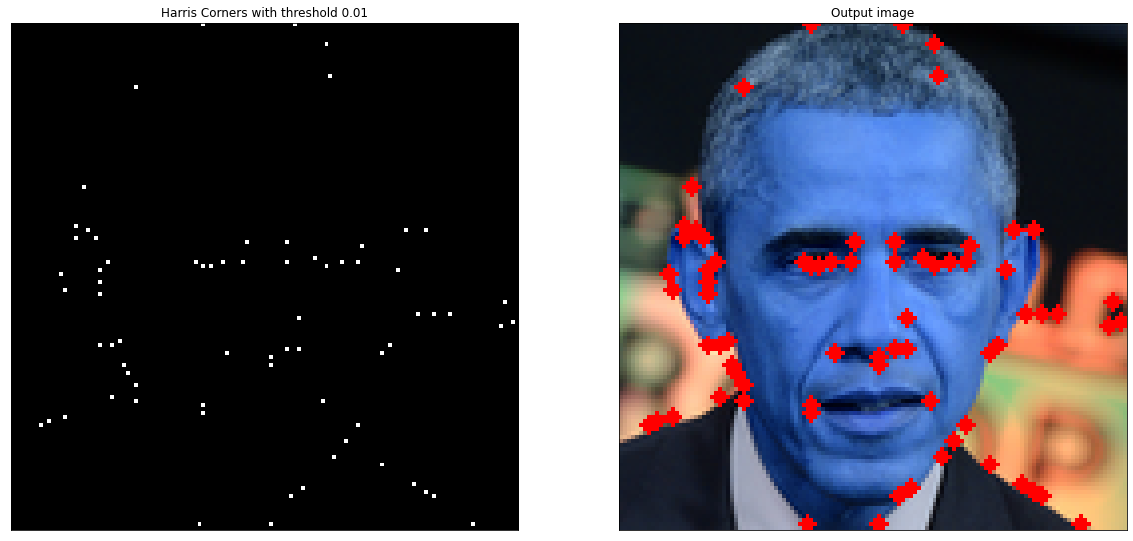

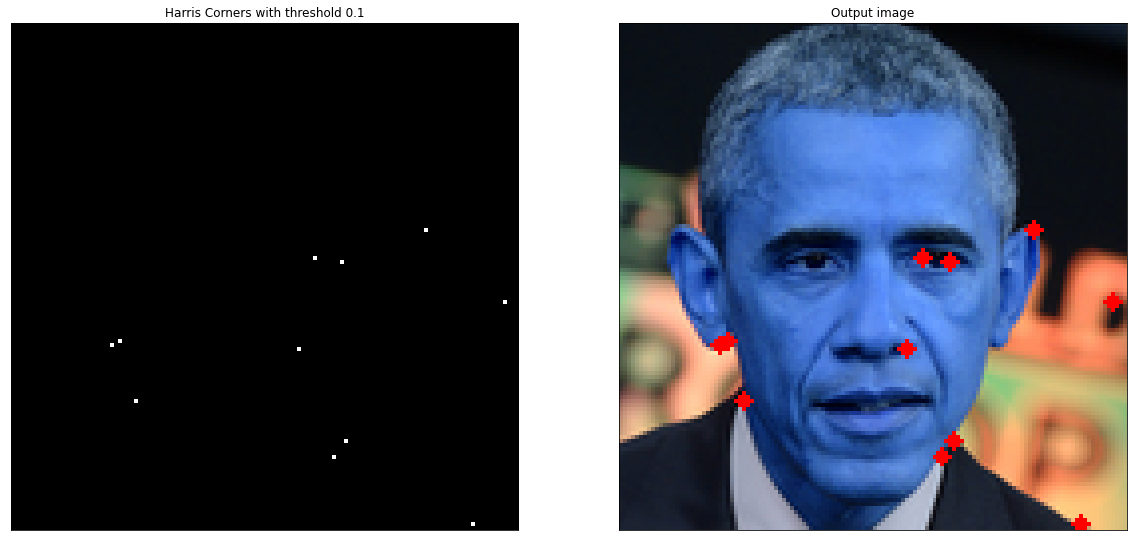

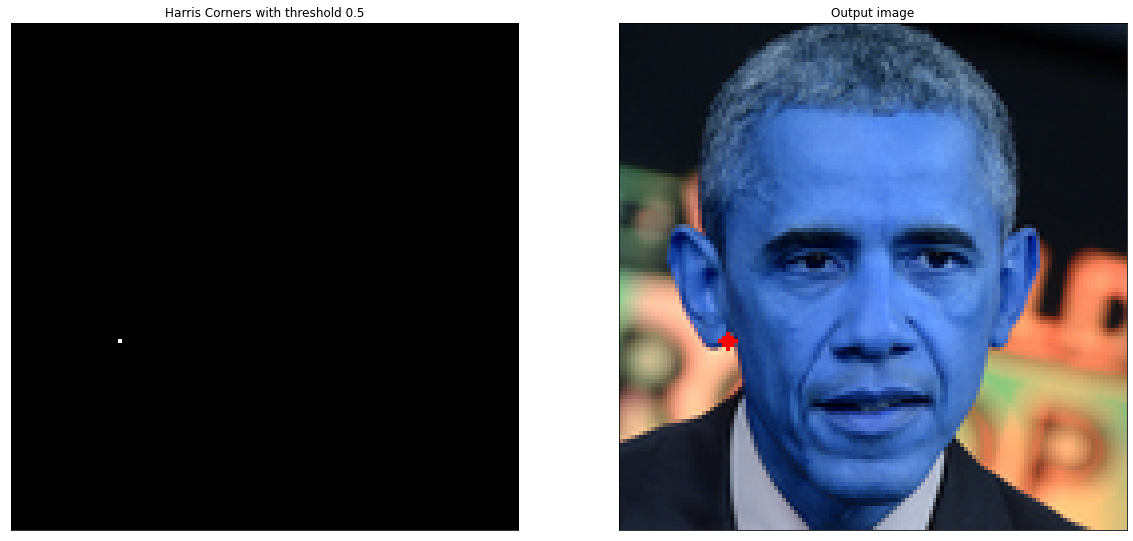

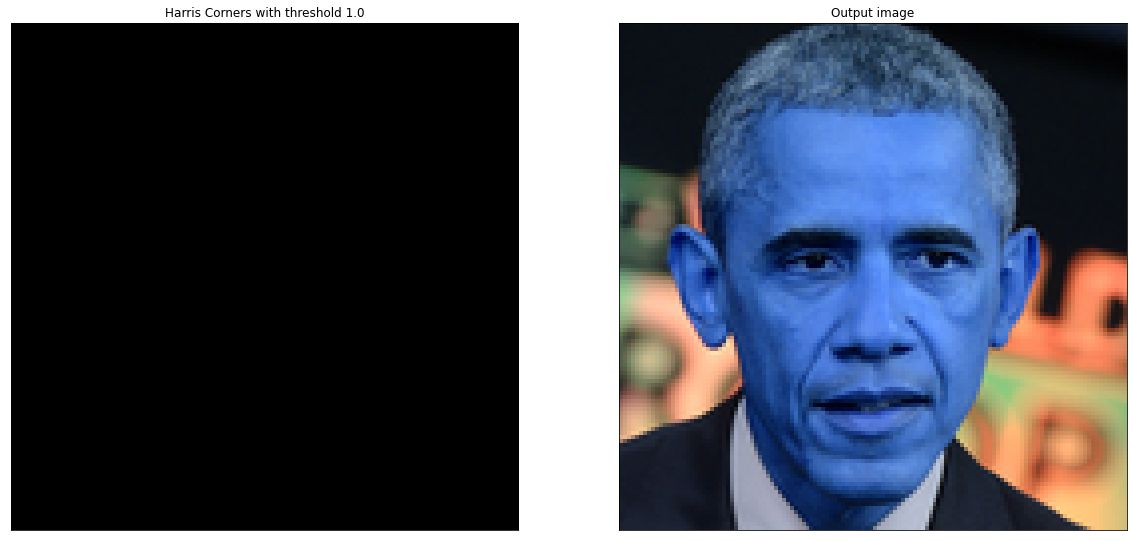

In [ ]:
# load image
face_image_path = path + "28550.png"
face_img = cv2.imread(face_image_path)

# convert to grayscale
face_img_gray = cv2.cvtColor(face_img, cv2.COLOR_RGB2GRAY)

# set threshold
threshold = np.array([0.005, 0.01, 0.1, 0.5, 1])
# plot grayscale image
plt.figure(figsize = (10, 10))
plt.imshow(face_img_gray, cmap = 'gray')
plt.title("Grayscale image"), plt.xticks([]), plt.yticks([])
for i in threshold:
  # copy image
  img_dis = face_img.copy()
  # apply harris corner detection
  HCD_face = harris_corner_detection(face_img_gray, i)

  # normalize corner map [0,1]
  # cv2.normalize(src, dst, alpha, beta, norm_type)
  # min_I(dst(I)) = alpha, max_I(dst(I)) = beta
  cv2.normalize(HCD_face, HCD_face, 0, 2, cv2.NORM_MINMAX)

  # list all points higher than threshold
  loc = np.where(HCD_face >= i)

  # loop though points
  for pt in zip(*loc[::-1]):
      # draw filled circle on each point
      # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
      cv2.circle(img_dis, pt, 2, (255,0,0), -1)

  # plot
  plt.figure(figsize = (20, 20))
  plt.subplot(121), plt.imshow(HCD_face, cmap = 'gray')
  plt.title("Harris Corners with threshold %s" %i), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(img_dis, cmap = 'gray')
  plt.title("Output image"), plt.xticks([]), plt.yticks([])
plt.show()

When the threshold value increases, less corners are shown in the output image. Even if the threshold value is very small, it still cannot form a face contour.